<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/IA353/EF1p4_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Model

In [1]:
import tensorflow as tf
import os
from keras.optimizers import Adam

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][pixels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

# model_json = model.to_json()
# json_file = open("model_CNN.json", "w")
# json_file.write(model_json)
# json_file.close()
# model.save_weights("model_CNN.h5")
# print("Model saved to disk")
# os.getcwd()

Epoch 1/5
1875/1875 [==============================] - 42s 7ms/step - loss: 0.3759 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0828 - accuracy: 0.9740
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0632 - accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0532 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0415 - accuracy: 0.9872


## Test Accuracy

In [4]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0336 - accuracy: 0.9893


[0.033605363219976425, 0.989300012588501]

## Kfold Cross-Validation

In [5]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 5


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                  activation='relu',
                                  input_shape=(28, 28, 1)))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=5,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.03135855868458748; accuracy of 98.97000193595886%
Score for fold 2: loss of 0.031214339658617973; accuracy of 99.07000064849854%
Score for fold 3: loss of 0.03160162642598152; accuracy of 98.91999959945679%
Score for fold 4: loss of 0.032454706728458405; accuracy of 99.02999997138977%
Score for fold 5: loss of 0.039164964109659195; accuracy of 98.83999824523926%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.03135855868458748 - Accuracy: 98.97000193595886%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.031214339658617973 - Accuracy: 99.07000064849854%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.03160162642598152 - Accuracy: 98.91999959945679%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.032

In [6]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Score for fold 1: loss of 0.01897255890071392; accuracy of 99.36000108718872%
Score for fold 2: loss of 0.02119559608399868; accuracy of 99.33000206947327%
Score for fold 3: loss of 0.020299673080444336; accuracy of 99.27999973297119%
Score for fold 4: loss of 0.020408136770129204; accuracy of 99.37000274658203%
Score for fold 5: loss of 0.020214088261127472; accuracy of 99.26999807357788%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.01897255890071392 - Accuracy: 99.36000108718872%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.02119559608399868 - Accuracy: 99.33000206947327%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.020299673080444336 - Accuracy: 99.27999973297119%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.020

# Modified Model

### Search for number of Conv2D-Maxpool layers

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=3,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j>2:
        model[j].add(Conv2D(128,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j>3:
        model[j].add(Conv2D(256,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j>4:
        model[j].add(Conv2D(512,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

    print(model[j].summary())

# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# TRAIN NETWORKS
history = [0] * nets
epochs = 10
names = ["(Conv2D+MaxPool)x1","(Conv2D+MaxPool)x2","(Conv2D+MaxPool)x3","(Conv2D+MaxPool)x4","(Conv2D+MaxPool)x5"]
print('------------------------ CNN NETWORKS ------------------------')
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 24)        240       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4704)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               1204480   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 1,207,290
Trainable params: 1,207,290
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_7"
_________________________________________________________________
Layer (type)     

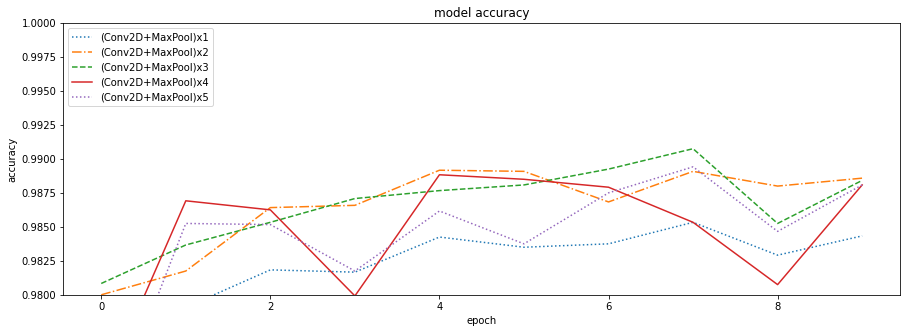

In [11]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j>2:
        model[j].add(Conv2D(128,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j>3:
        model[j].add(Conv2D(256,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j>4:
        model[j].add(Conv2D(512,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

    print(model[j].summary())

# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# TRAIN NETWORKS
history = [0] * nets
epochs = 10
names = ["(Conv2D+MaxPool)x1","(Conv2D+MaxPool)x2","(Conv2D+MaxPool)x3","(Conv2D+MaxPool)x4","(Conv2D+MaxPool)x5"]
print('------------------------ CNN NETWORKS ------------------------')
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 24)        624       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 24)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4704)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               1204480   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 1,207,674
Trainable params: 1,207,674
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_12"
_________________________________________________________________
Layer (type)   

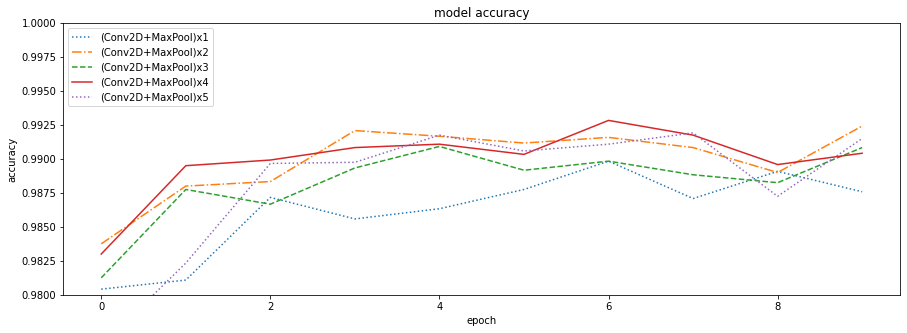

In [13]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

### Search for the number of filters

In [14]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    print(model[j].summary())

    
# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 10
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

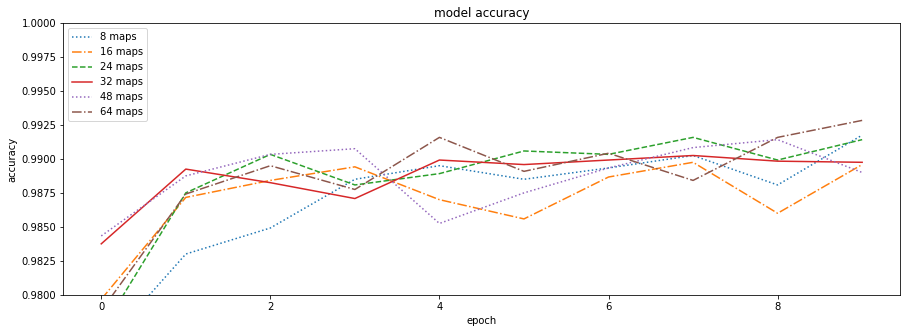

In [15]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

### Search for the number of neurons after flatten

In [19]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(48,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 10
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0N: Epochs=10, Train accuracy=0.99629, Validation accuracy=0.98825
CNN 32N: Epochs=10, Train accuracy=0.99569, Validation accuracy=0.98983
CNN 64N: Epochs=10, Train accuracy=0.99715, Validation accuracy=0.98983
CNN 128N: Epochs=10, Train accuracy=0.99754, Validation accuracy=0.99008
CNN 256N: Epochs=10, Train accuracy=0.99808, Validation accuracy=0.99100
CNN 512N: Epochs=10, Train accuracy=0.99727, Validation accuracy=0.99092
CNN 1024N: Epochs=10, Train accuracy=0.99746, Validation accuracy=0.99042
CNN 2048N: Epochs=10, Train accuracy=0.99790, Validation accuracy=0.99083


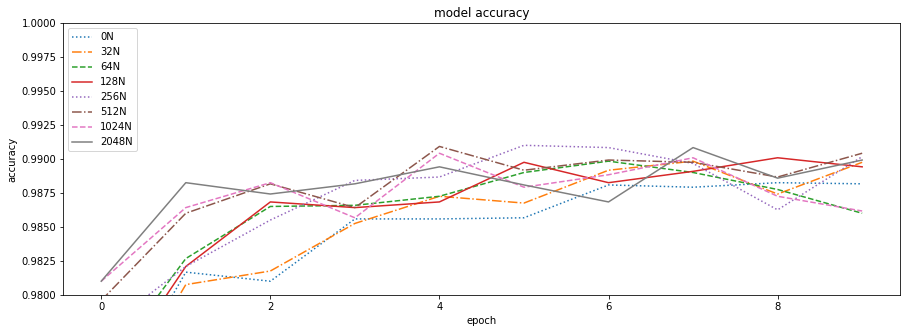

In [20]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

### Search for the best dropout rate

In [22]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(48,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN D=0: Epochs=30, Train accuracy=0.99958, Validation accuracy=0.99258
CNN D=0.1: Epochs=30, Train accuracy=0.99871, Validation accuracy=0.99367
CNN D=0.2: Epochs=30, Train accuracy=0.99752, Validation accuracy=0.99433
CNN D=0.3: Epochs=30, Train accuracy=0.99523, Validation accuracy=0.99500
CNN D=0.4: Epochs=30, Train accuracy=0.99187, Validation accuracy=0.99483
CNN D=0.5: Epochs=30, Train accuracy=0.98625, Validation accuracy=0.99442
CNN D=0.6: Epochs=30, Train accuracy=0.97746, Validation accuracy=0.99383
CNN D=0.7: Epochs=30, Train accuracy=0.96008, Validation accuracy=0.99050


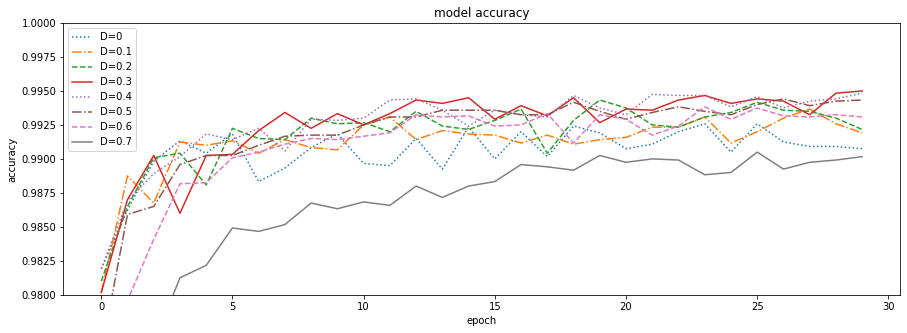

In [23]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [27]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 5

fold_no = 1

train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(24, kernel_size=(5, 5),
                                  activation='relu',
                                  input_shape=(28, 28, 1)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.3))
  # model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer=Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=10,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.027066867798566818; accuracy of 99.04999732971191%
Score for fold 2: loss of 0.02345750294625759; accuracy of 99.22999739646912%
Score for fold 3: loss of 0.021516112610697746; accuracy of 99.34999942779541%
Score for fold 4: loss of 0.02148846536874771; accuracy of 99.26000237464905%
Score for fold 5: loss of 0.025041092187166214; accuracy of 99.18000102043152%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.027066867798566818 - Accuracy: 99.04999732971191%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.02345750294625759 - Accuracy: 99.22999739646912%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.021516112610697746 - Accuracy: 99.34999942779541%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.02